### Задача

Анализ датасета. Датасет в формате `Datumaro 1.0`.

### Import

In [1]:
import json
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

### Open data

In [2]:
path_anns = '../data/dataset/combined/annotations/default.json'

In [3]:
with open(path_anns, 'r') as f:
    data = json.load(f)

### Data structure

In [4]:
data.keys()

dict_keys(['info', 'categories', 'items'])

In [5]:
data['categories']['label']['labels']

[{'name': 'room', 'parent': '', 'attributes': []},
 {'name': 'bathroom', 'parent': '', 'attributes': []},
 {'name': 'inner_corridor', 'parent': '', 'attributes': []},
 {'name': 'public_place', 'parent': '', 'attributes': []},
 {'name': 'floor_finish', 'parent': '', 'attributes': []},
 {'name': 'floor_init', 'parent': '', 'attributes': []},
 {'name': 'ceiling_finish', 'parent': '', 'attributes': []},
 {'name': 'wall_finish', 'parent': '', 'attributes': []},
 {'name': 'wall_init', 'parent': '', 'attributes': []},
 {'name': 'door_room', 'parent': '', 'attributes': []},
 {'name': 'toilet_yes', 'parent': '', 'attributes': []},
 {'name': 'bath_yes', 'parent': '', 'attributes': []},
 {'name': 'esocket_yes', 'parent': '', 'attributes': []},
 {'name': 'kitchen_furniture_yes', 'parent': '', 'attributes': []},
 {'name': 'radiator', 'parent': '', 'attributes': []},
 {'name': 'floor_without', 'parent': '', 'attributes': []},
 {'name': 'ceiling_without', 'parent': '', 'attributes': []},
 {'name': 'w

In [6]:
len(data['items'])

20495

In [7]:
data['items'][0]

{'id': 'ANMR0007d101122c03200',
 'annotations': [{'id': 0,
   'type': 'label',
   'attributes': {},
   'group': 0,
   'label_id': 3},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 7},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 46},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 43},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 41},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 32},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 28},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 6},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 4},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 29}],
 'attr': {'frame': 973},
 'image': {'path': 'ANMR0007d101122c03200.jpg', 'size': [1520, 2688]},
 'media': {'path': 'ANMR0007d101122c03200.jpg'}}

In [8]:
data['items'][0]['annotations']

[{'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 3},
 {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 7},
 {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 46},
 {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 43},
 {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 41},
 {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 32},
 {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 28},
 {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 6},
 {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 4},
 {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 29}]

In [9]:
data['items'][0]['image']

{'path': 'ANMR0007d101122c03200.jpg', 'size': [1520, 2688]}

In [10]:
data['items'][0]

{'id': 'ANMR0007d101122c03200',
 'annotations': [{'id': 0,
   'type': 'label',
   'attributes': {},
   'group': 0,
   'label_id': 3},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 7},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 46},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 43},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 41},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 32},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 28},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 6},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 4},
  {'id': 0, 'type': 'label', 'attributes': {}, 'group': 0, 'label_id': 29}],
 'attr': {'frame': 973},
 'image': {'path': 'ANMR0007d101122c03200.jpg', 'size': [1520, 2688]},
 'media': {'path': 'ANMR0007d101122c03200.jpg'}}

### Visualization

### Random

Рандомное изображение.

Labels:
room
place_radiator
window
floor_init
wall_finish


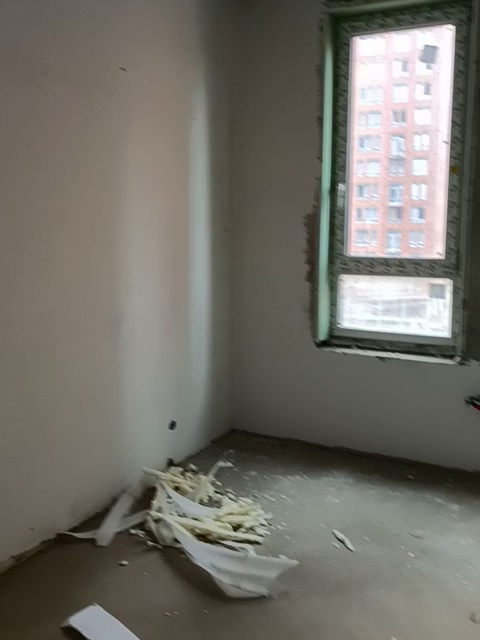

In [11]:
import cv2
from PIL import Image
from random import choice

num_examples = len(data['items'])
id_label = {i:a['name'] for i, a in enumerate(data['categories']['label']['labels'])}

k = choice(range(num_examples))

ann = data['items'][k]

file_name = ann['image']['path'].split('/')[-1]
labels = [a['label_id'] for a in ann['annotations']]

path_imgs = f'{Path(path_anns).parent.parent}/images/default'
path_img = f'{path_imgs}/{file_name}'

img = cv2.imread(path_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('Labels:')
print('='*15)

if len(labels) == 0:
    print('no labels')
    
for i in labels:
    print(f'{id_label[i]}')
    
Image.fromarray(img)

### Convert data

Для удобства анализа, переведем формат `Datumaro 1.0` в `One-Hot Encoding` в `csv`.

In [12]:
from tqdm import tqdm



num_cat = len(data['categories']['label']['labels'])
all_vectors = np.array([]).reshape(0, num_cat+1)

for d in tqdm(data['items']):
    file_name = d['id']
    anns = d['annotations']
    vector = np.zeros(num_cat).astype(int)
    for ann in anns:
        vector[ann['label_id']] = 1
    
    vector = np.insert(vector.astype('<U200'), 0, file_name)
    all_vectors = np.vstack([all_vectors, vector])
    
columns = ['file_name'] + [ann['name'] for ann in data['categories']['label']['labels']]

df_all = pd.DataFrame(all_vectors, columns=columns)

100%|██████████| 20495/20495 [3:00:33<00:00,  1.89it/s]  


In [13]:
df_all

,file_name,room,bathroom,inner_corridor,public_place,floor_finish,floor_init,ceiling_finish,wall_finish,wall_init,...,electrical_cable,electrical_riser,lamp,door_mop,door_entrance,socket_box,tongue_groove_blocks,tile_plinth,pantry,bad_light
0,ANMR0007d101122c03200,0,0,0,1,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
1,ANMR0007d101122c03190,0,0,0,1,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
2,ANMR0007d101122c03180,0,0,0,1,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
3,ANMR0007d101122c03170,0,0,0,1,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
4,ANMR0007d101122c03160,0,0,0,1,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20490,Hand_Московская обл._БИТЦА_[7й корпус]_1_10_3_...,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
20491,Hand_Московская обл._БИТЦА_[7й корпус]_1_10_3_...,0,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
20492,Hand_Московская обл._БИТЦА_[7й корпус]_1_10_3_...,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20493,Hand_Московская обл._БИТЦА_[7й корпус]_1_10_3_...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split

В дальнейшем будем работать с форматом `csv`, строить обучение с этим форматом, т.к. удобнее анализировать, разделить на подвыборки, делать ребалансировку.

In [14]:
from sklearn.model_selection import train_test_split

# 39 2 6 # 14 # 52 #
seed = 14
np.random.seed(seed)

df_train, df_val = train_test_split(df_all, test_size=0.2, random_state=seed, shuffle=True)
df_val, df_test = train_test_split(df_val, test_size=0.5, random_state=seed, shuffle=True)

In [15]:
len(df_train), len(df_val), len(df_test)

(16396, 2049, 2050)

In [16]:
len(df_train) / len(df_all), len(df_val) / len(df_all), len(df_test) / len(df_all)

(0.8, 0.09997560380580629, 0.1000243961941937)

### Save split data

In [18]:
import os


dir_save = '../data/dataset/combined/csv/'

if not os.path.exists(dir_save):
    os.makedirs(dir_save)
    
df_all.to_csv(f'{dir_save}/all.csv', columns=columns, index=False)

df_train.to_csv(f'{dir_save}/train.csv', columns=columns, index=False)
df_val.to_csv(f'{dir_save}/val.csv', columns=columns, index=False)
df_test.to_csv(f'{dir_save}/test.csv', columns=columns, index=False)

### Баланс по классам

In [19]:
df_all = pd.read_csv(f'{dir_save}/all.csv')

df_train = pd.read_csv(f'{dir_save}/train.csv')
df_val = pd.read_csv(f'{dir_save}/val.csv')
df_test =  pd.read_csv(f'{dir_save}/test.csv')

In [20]:
df_test

,file_name,room,bathroom,inner_corridor,public_place,floor_finish,floor_init,ceiling_finish,wall_finish,wall_init,...,electrical_cable,electrical_riser,lamp,door_mop,door_entrance,socket_box,tongue_groove_blocks,tile_plinth,pantry,bad_light
0,ANMR0007_frame3840,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ANMR0018_frame22150,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,QR_Московская обл._БИТЦА_[7й корпус]_4_21_3_DQ...,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,QRCode_Москва_ОСТАФЬЕВО_12.3_3_10_PY09B0_19-05...,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,QRCode_Москва_ОСТАФЬЕВО_12.3_2_11_HOEy6v_12-06...,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,QRCode_Москва_ОСТАФЬЕВО_12.3_2_7_fNbbIg_13-06-...,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2046,QR_1_6_3_ih3Smn_25-01-24_decor_frame2000,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2047,ANMR0001_frame2256,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2048,QRCode_Москва_ОСТАФЬЕВО_12.3_2_11_flM35S_16-05...,1,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
def balance(df: pd.DataFrame, sampling: str) -> None:
    sf = df.iloc[:, 1:].astype(int).sum(axis=0)
    cnt = pd.DataFrame({'tag':sf.index, 'count':sf.values})

    n = len(cnt)
    plt.figure(figsize=(20, 9))
    plt.bar(range(n), cnt['count'], color='teal')
    plt.title(sampling, fontsize=20)
    plt.yticks(fontsize = 20)
    plt.xticks(range(n), cnt['tag'], rotation=90, fontsize=20);

In [22]:
def balance_with_percent(df: pd.DataFrame, sampling: str) -> None:
    sf = df.iloc[:, 1:].astype(int).sum(axis=0)
    percents = np.round(sf.values / sum(sf.values) * 100, 1)
    cnt = pd.DataFrame({'label': sf.index, 'num': sf.values, 'percent': percents})

    plt.rc('font', size=15)

    fig, ax = plt.subplots()
    fig.set_figwidth(19)
    fig.set_figheight(10)

    plt.title(f'Distribution {sampling} data | {len(df)} examples')
    plt.ylabel('Amount')

    for i, row in cnt.iterrows():
        ax.bar(row['label'], row['num'], color='teal', alpha=1)

    ax.set_xticks(range(len(cnt)), cnt['label'], rotation=90, fontsize=20);

    rects = ax.patches

    for num, percent, rect in zip(cnt['num'], cnt['percent'], rects):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            height,
            f'{percent}%\n{num}',
            ha="center",
            va="bottom",
            fontsize=12
        )
        
    plt.subplots_adjust(bottom=0.3)
    plt.savefig(f'{sampling}.png')

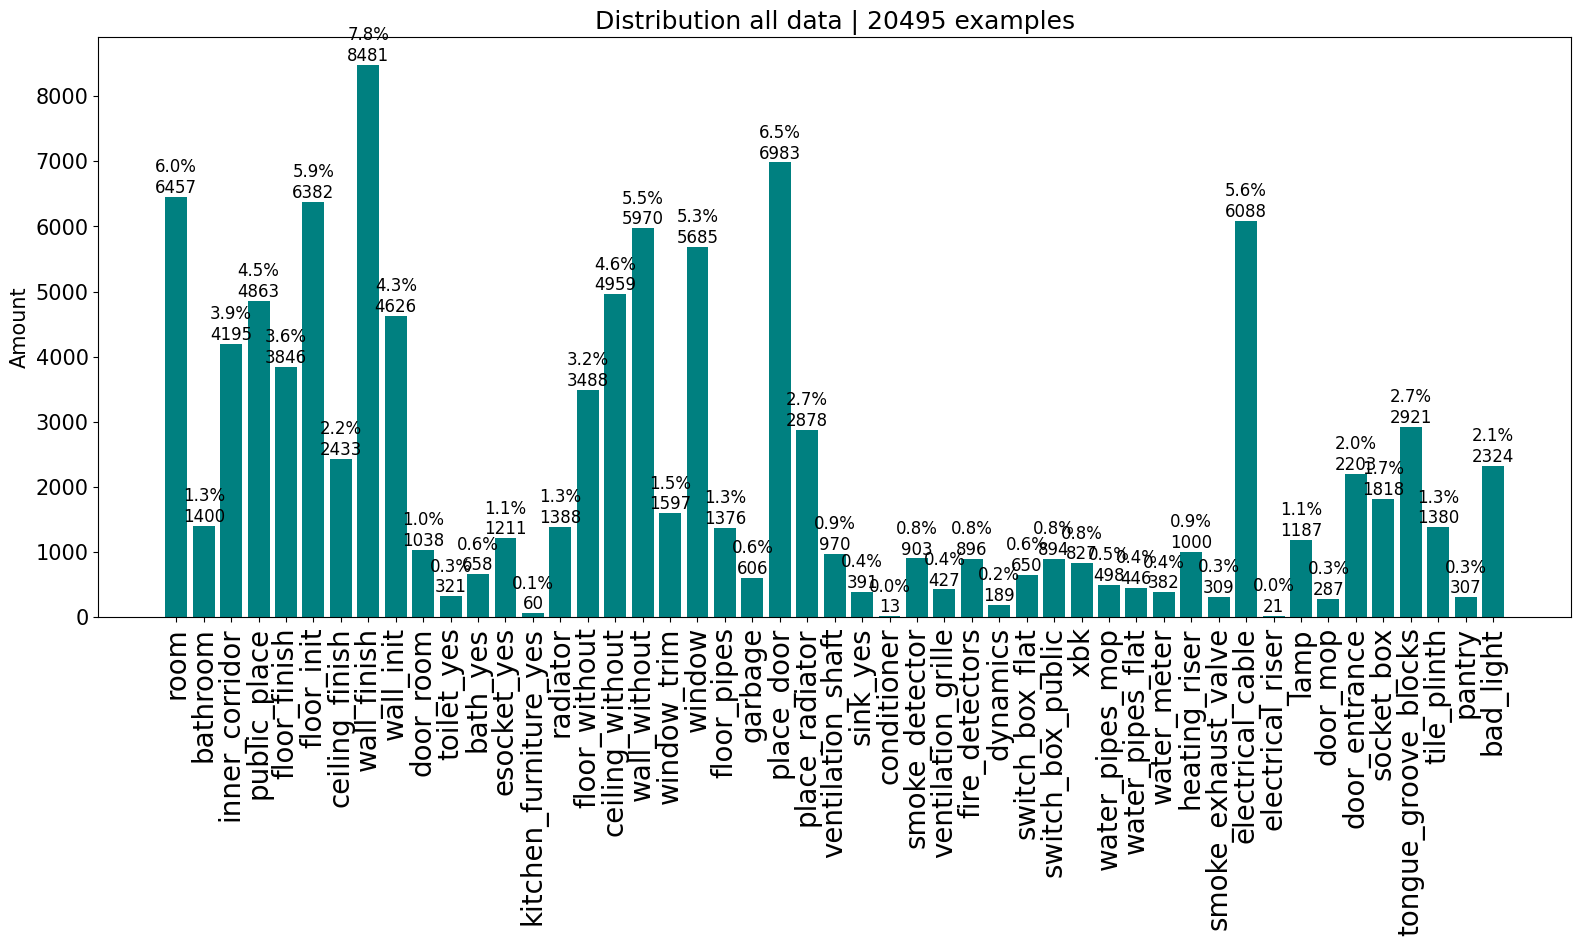

In [23]:
balance_with_percent(df_all, sampling='all')

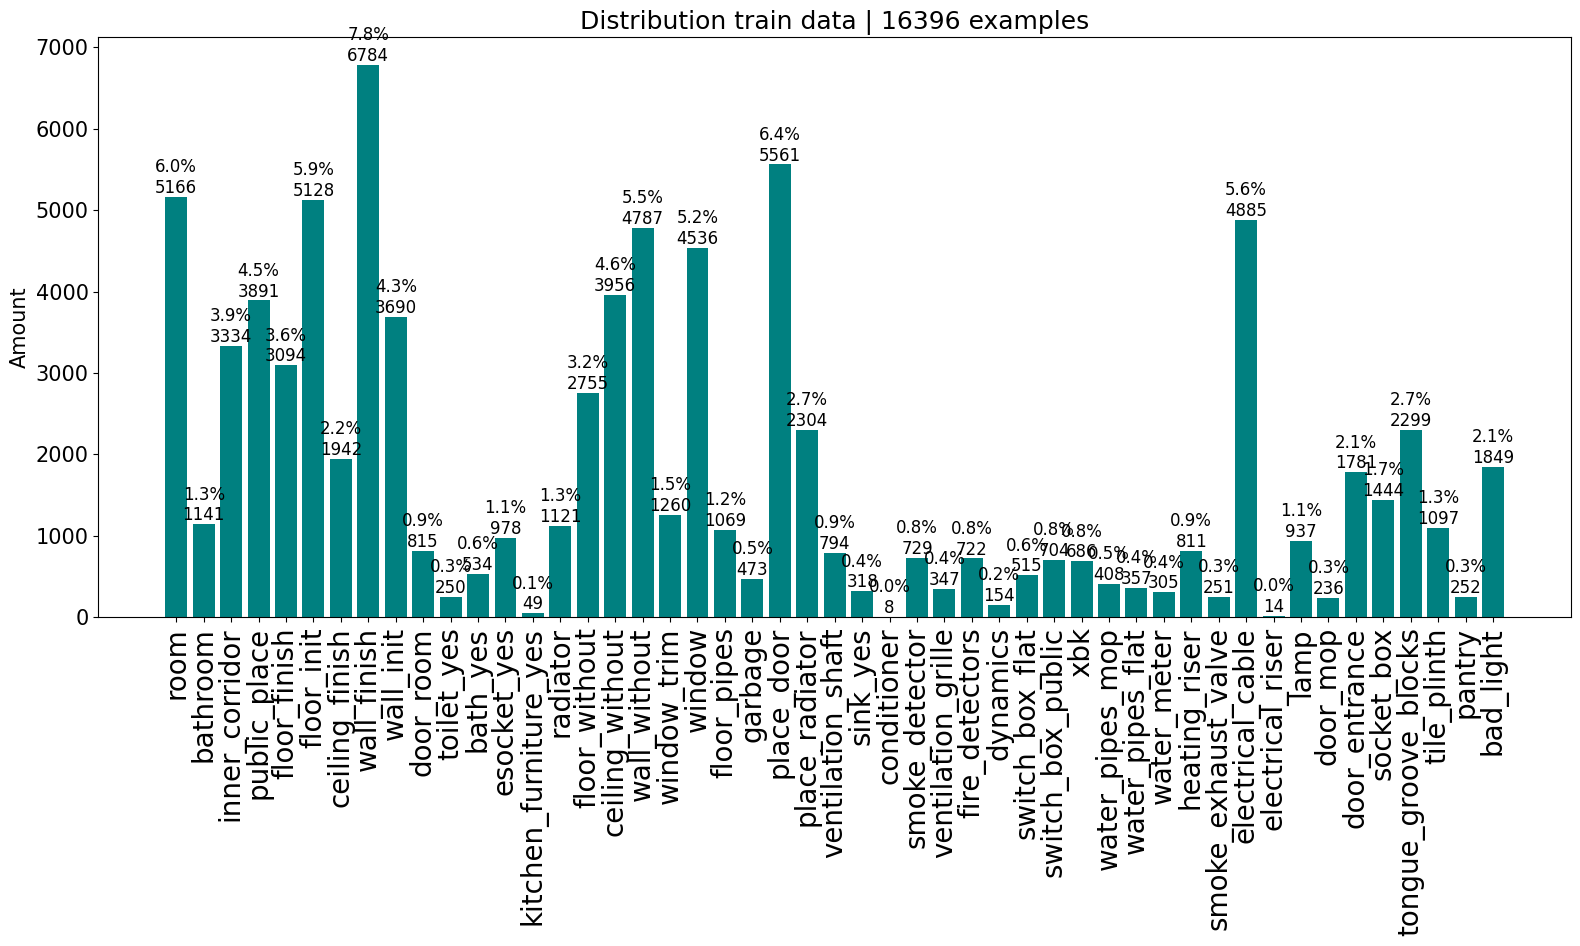

In [24]:
balance_with_percent(df_train, sampling='train')

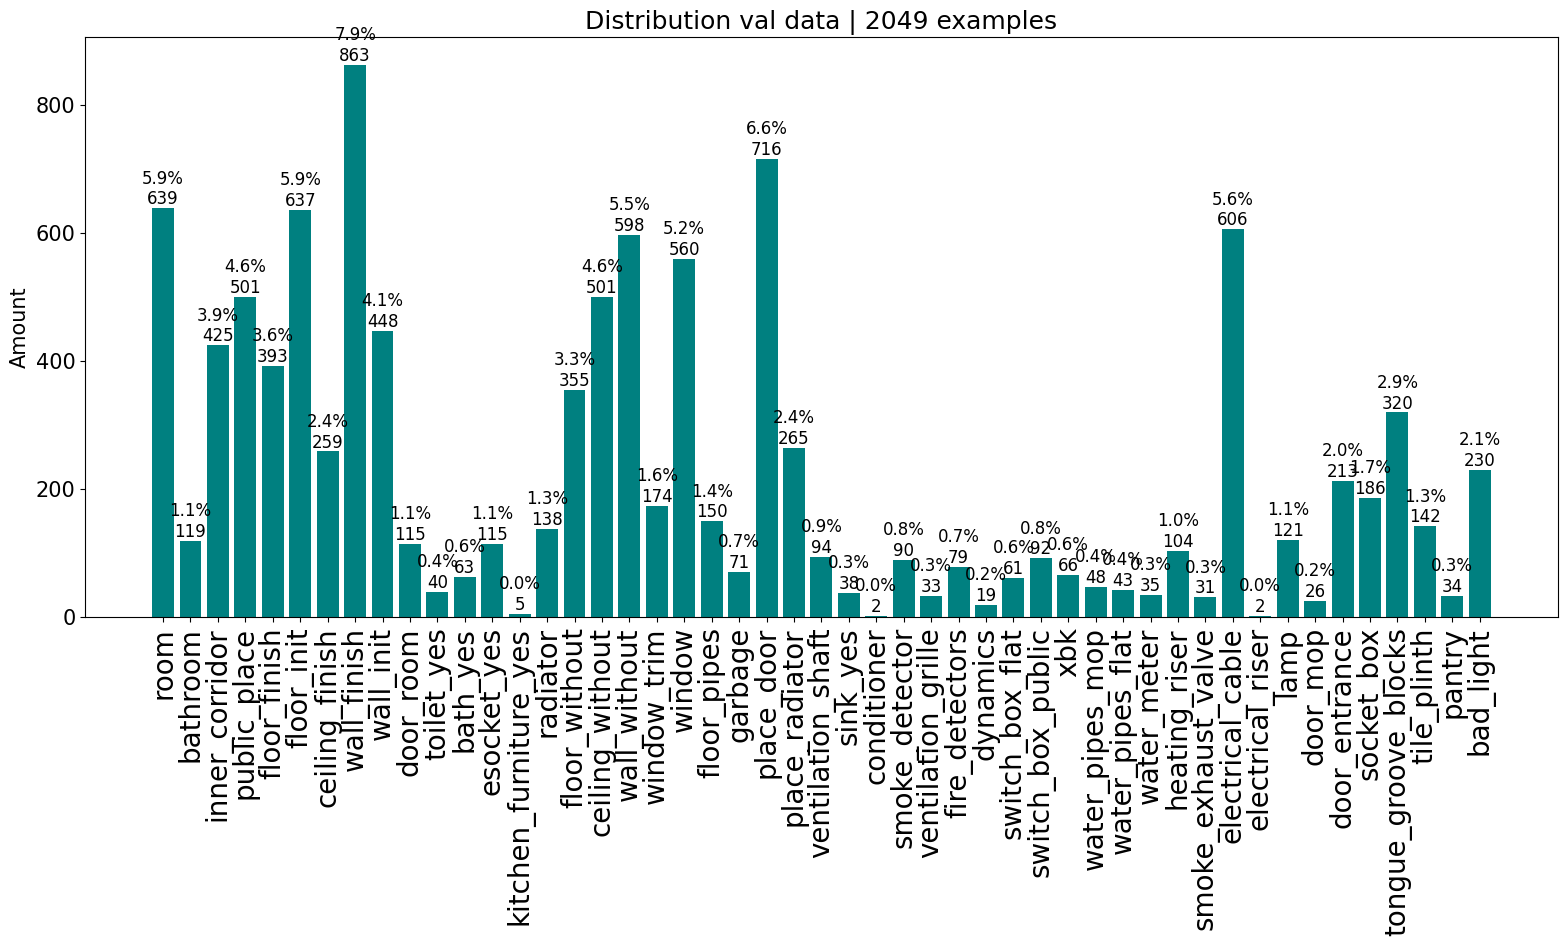

In [25]:
balance_with_percent(df_val, sampling='val')

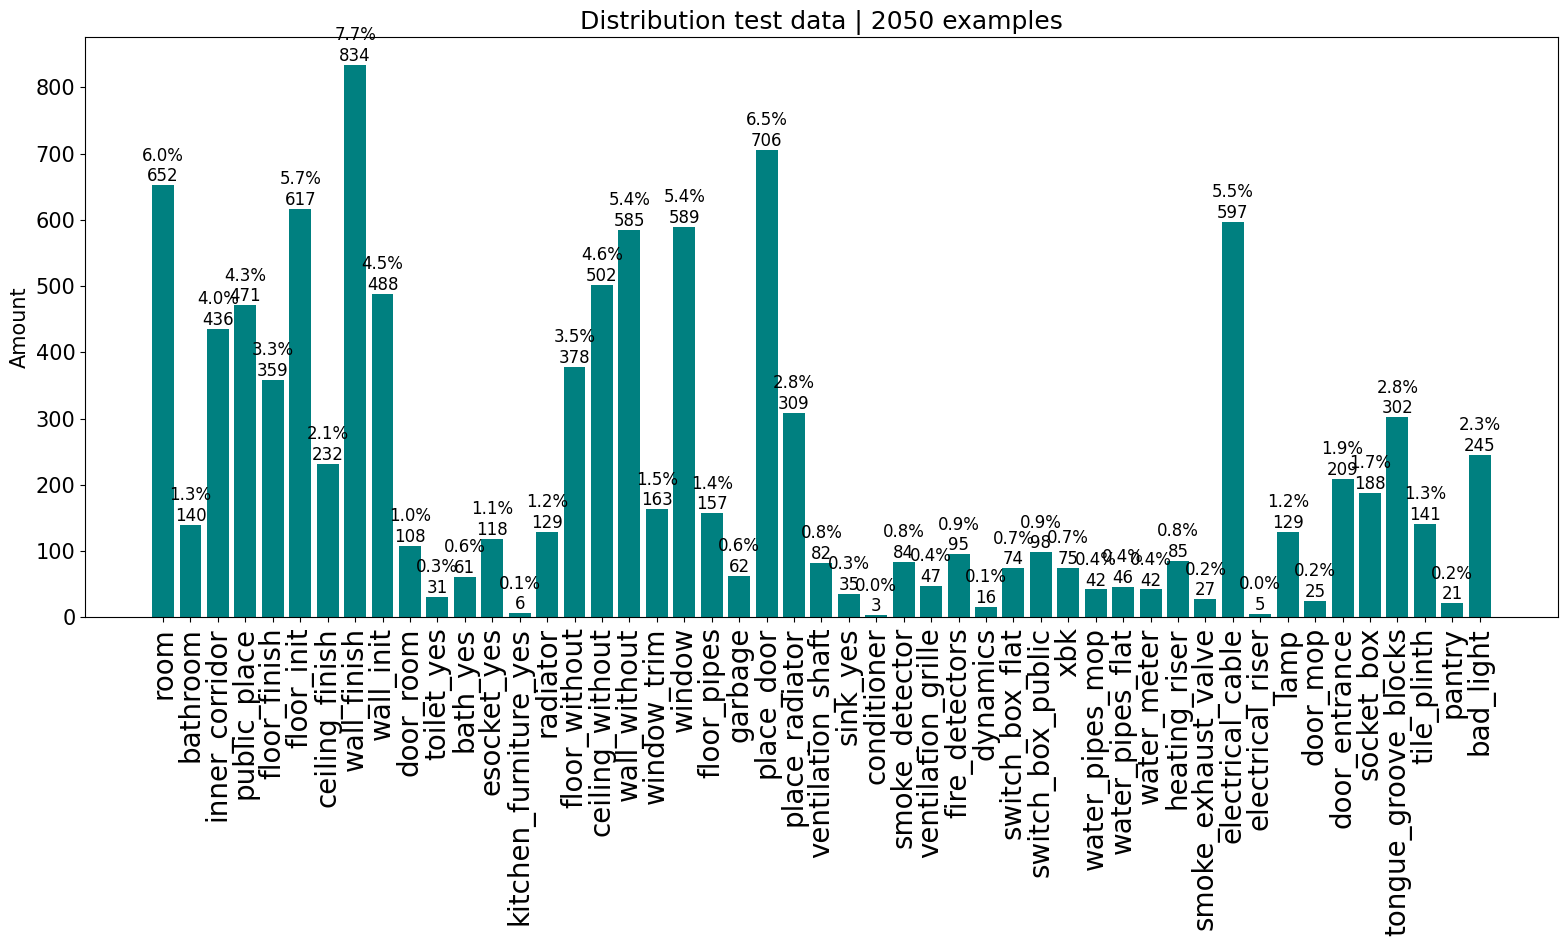

In [26]:
balance_with_percent(df_test, sampling='test')

### Label

Визуализировать случайное изображение на котором присутствует `x` лейбл. Возьмем конвертированный в `csv` датасет.

In [31]:
def get_optimal_font_scale(text: str, width: int, scaling_weight: float) -> float:
    for scale in reversed(range(0, 60, 1)):
        textSize = cv2.getTextSize(text, fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=scale/scaling_weight, thickness=1)
        new_width = textSize[0][0]
        if (new_width <= width):
            return scale/scaling_weight/5
    return 1.0

In [32]:
def visualization(path_img: str, path_save: str, lines: list) -> None:
    
    image = cv2.imread(path_img)
    
    file_name = Path(path_img).name
    
    if len(lines) <= 3:
        line_shift = 0.2
    else:
        line_shift = 0.05

    alpha = 0.8

    h, w = image.shape[:2]

    overlay = image.copy()

    x, y = 100, 100
    h_rect = int(h*0.1*len(lines))
    w_rect = int(w*0.22)

    cv2.rectangle(overlay, (x, y), (x+w_rect, y+h_rect), (0, 0, 0), -1)

    image_with_rect = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)

    if w + h > 2000:
        scaling_weight = 10
    elif 1000 < w + h < 2000:
        scaling_weight = 20
    elif 500 < w + h < 2000:
        scaling_weight = 35
    else:
        scaling_weight = 45
        
    predictions = [text.split(':')[0] for status, text in lines if status == 'prediction']
    targets = [text.split(':')[0] for status, text in lines if status == 'target']
    
    for i, (status, text) in enumerate(lines, start=1):
        if status == 'background':
            color = (139, 0, 255)
        elif status == 'prediction':
            if text.split(':')[0] in targets:
                color = (152, 251, 152)
            else:
                color = (255, 255, 255)
        elif status == 'target':
            if text in predictions:
                color = (152, 251, 152)
            else:
                color = (255, 255, 255)
            
        cv2.putText(
            image_with_rect,
            text,
            (int(x+(w_rect*0.1)), y+(i*int(h_rect*line_shift))),
            cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=get_optimal_font_scale(text, w, scaling_weight),
            color=color,
            thickness=round((w * h) / (1000 * 1000))
        )
    
    cv2.imwrite(f'{path_save}/{file_name}', image_with_rect)

In [27]:
path_dataset = '../data/dataset/combined/csv/test.csv'
path_imgs = '../data/dataset/combined/images/default'

In [28]:
list_labels = [d['name'] for d in data['categories']['label']['labels']]

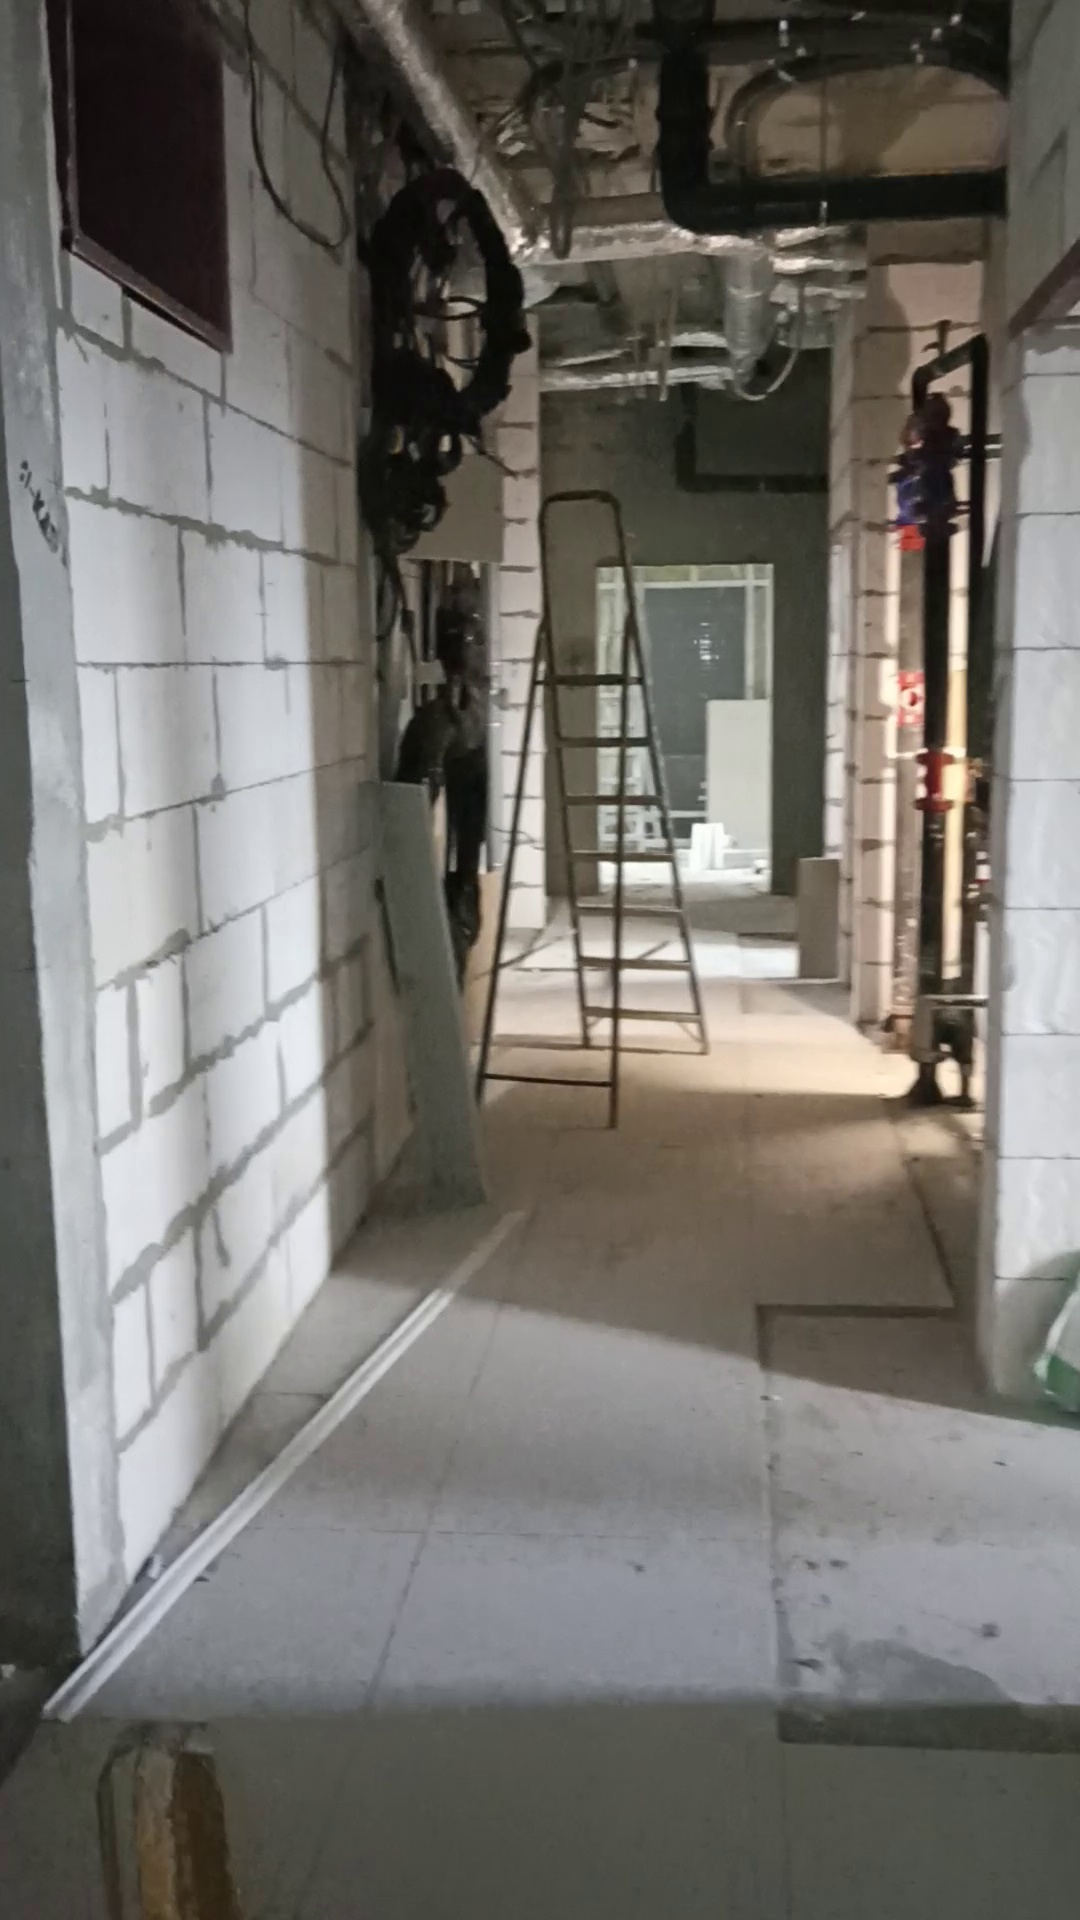

In [36]:
label = 'wall_init'

df = pd.read_csv(path_dataset)
df = df[df[label] == 1].reset_index(drop=True)

k = choice(range(len(df)))

path_img = f'{path_imgs}/{df.iloc[k, :]["file_name"]}.jpg'

img = cv2.imread(path_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Image.fromarray(img)

### Количество тегов на кадр

In [29]:
def num_labels_per_image(df: pd.DataFrame, sampling: str) -> None:

    sf = df.iloc[:, 1:].astype(int).sum(axis=1)

    num_tag = sf.value_counts().sort_index().index
    count = sf.value_counts().sort_index().values

    df_num_tag = pd.DataFrame({'num_tag': num_tag, 'count': count})

    n = len(df_num_tag)
    plt.figure(figsize=(20, 9))
    plt.bar(range(n), df_num_tag['count'], color='teal')
    plt.title(sampling, fontsize=20)
    plt.yticks(fontsize=15)
    plt.xticks(range(n), df_num_tag['num_tag'], rotation=0, fontsize=15)
    plt.ylabel('Количество изображений', rotation=90, fontsize=20);
    plt.xlabel('Количество лейблов на изображение', fontsize=20);

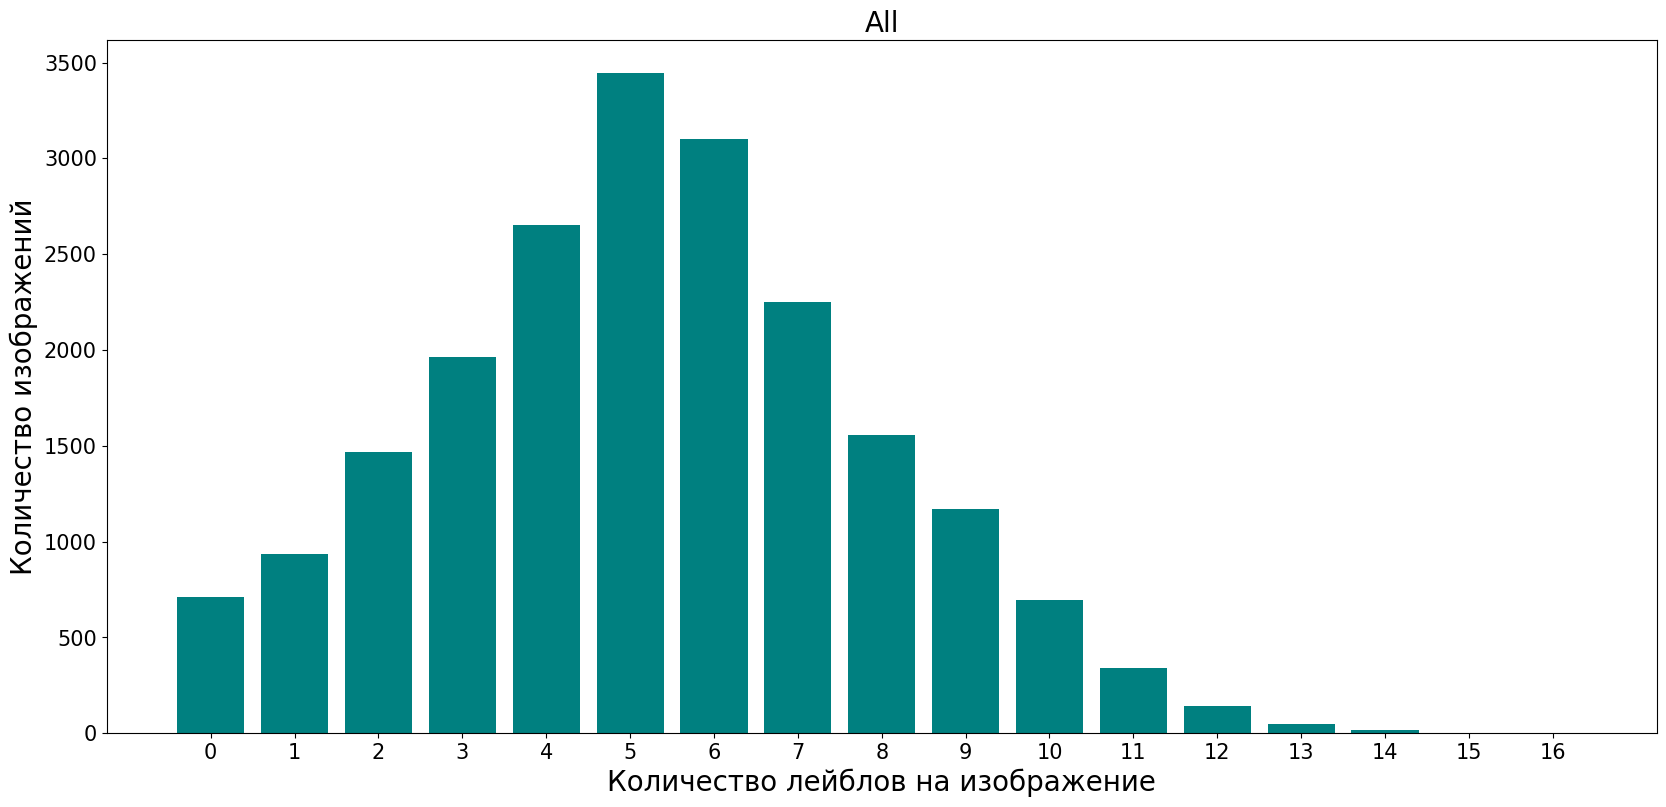

In [30]:
num_labels_per_image(df_all, 'All')

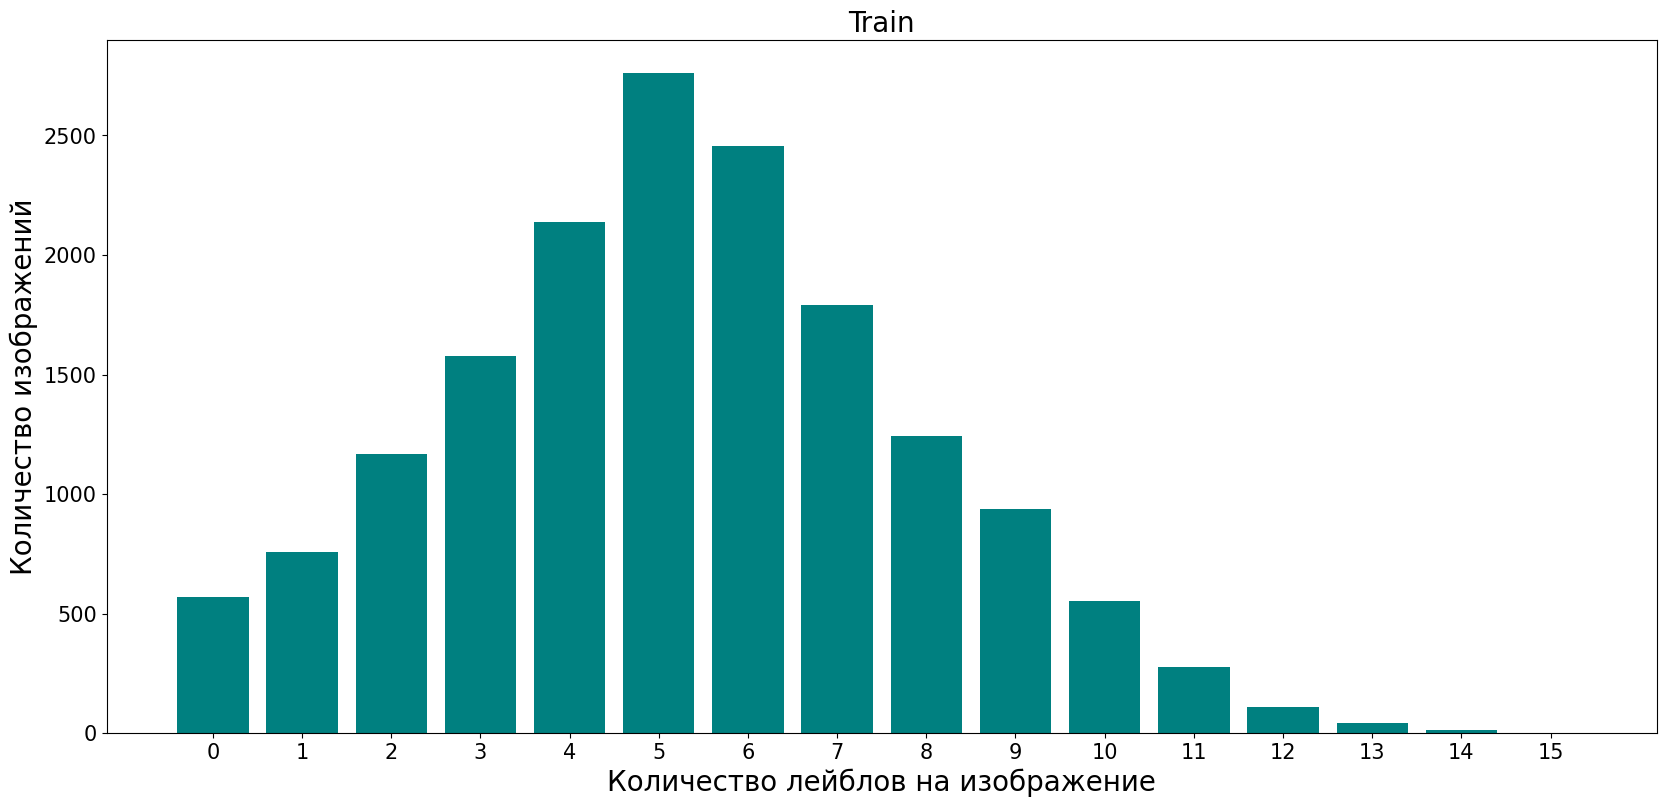

In [31]:
num_labels_per_image(df_train, 'Train')

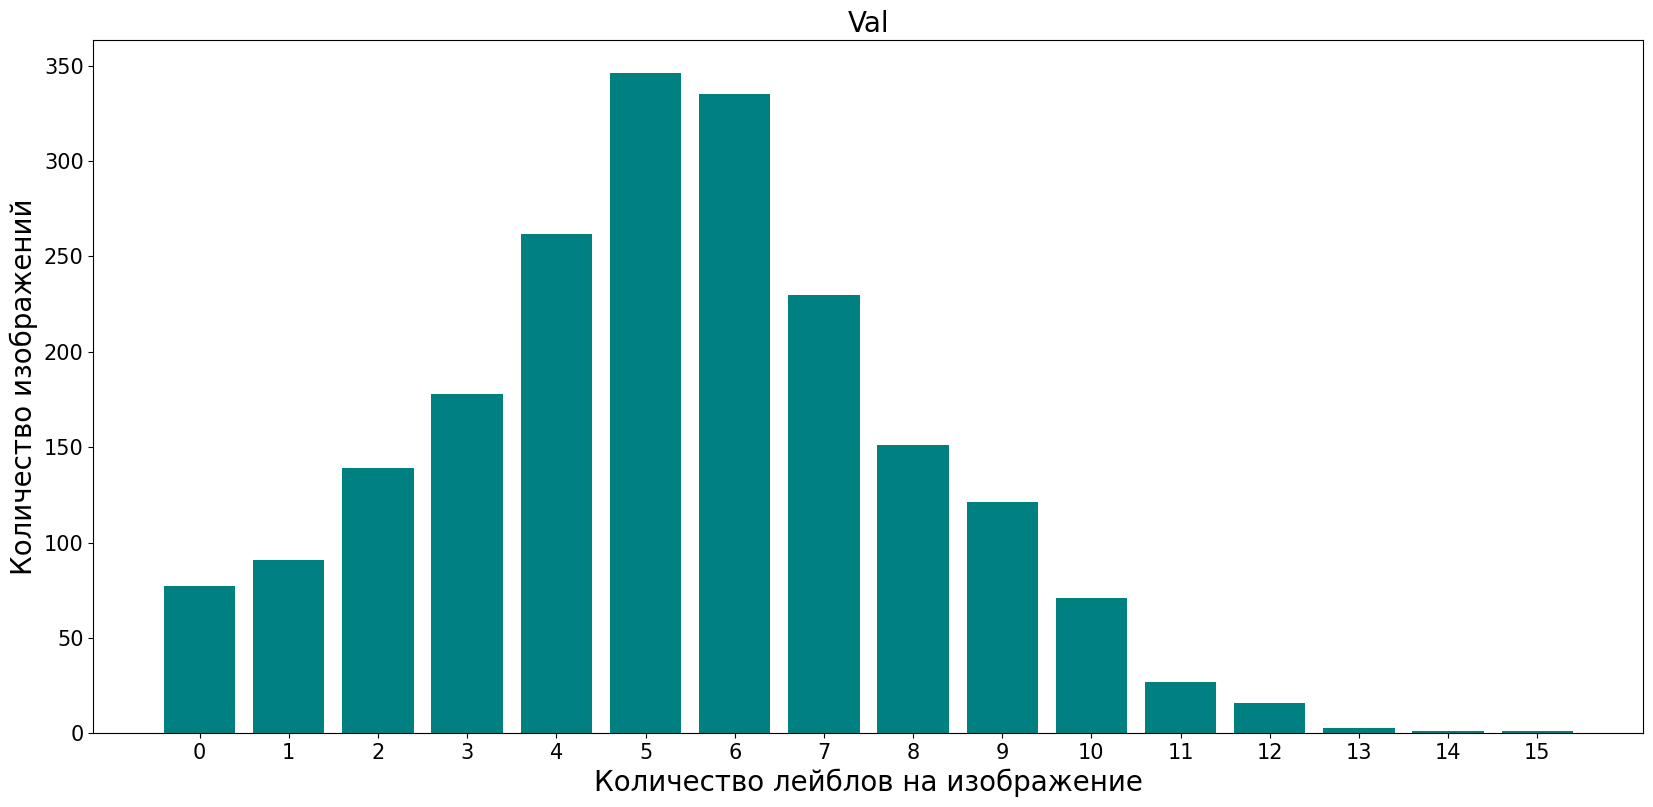

In [32]:
num_labels_per_image(df_val, 'Val')

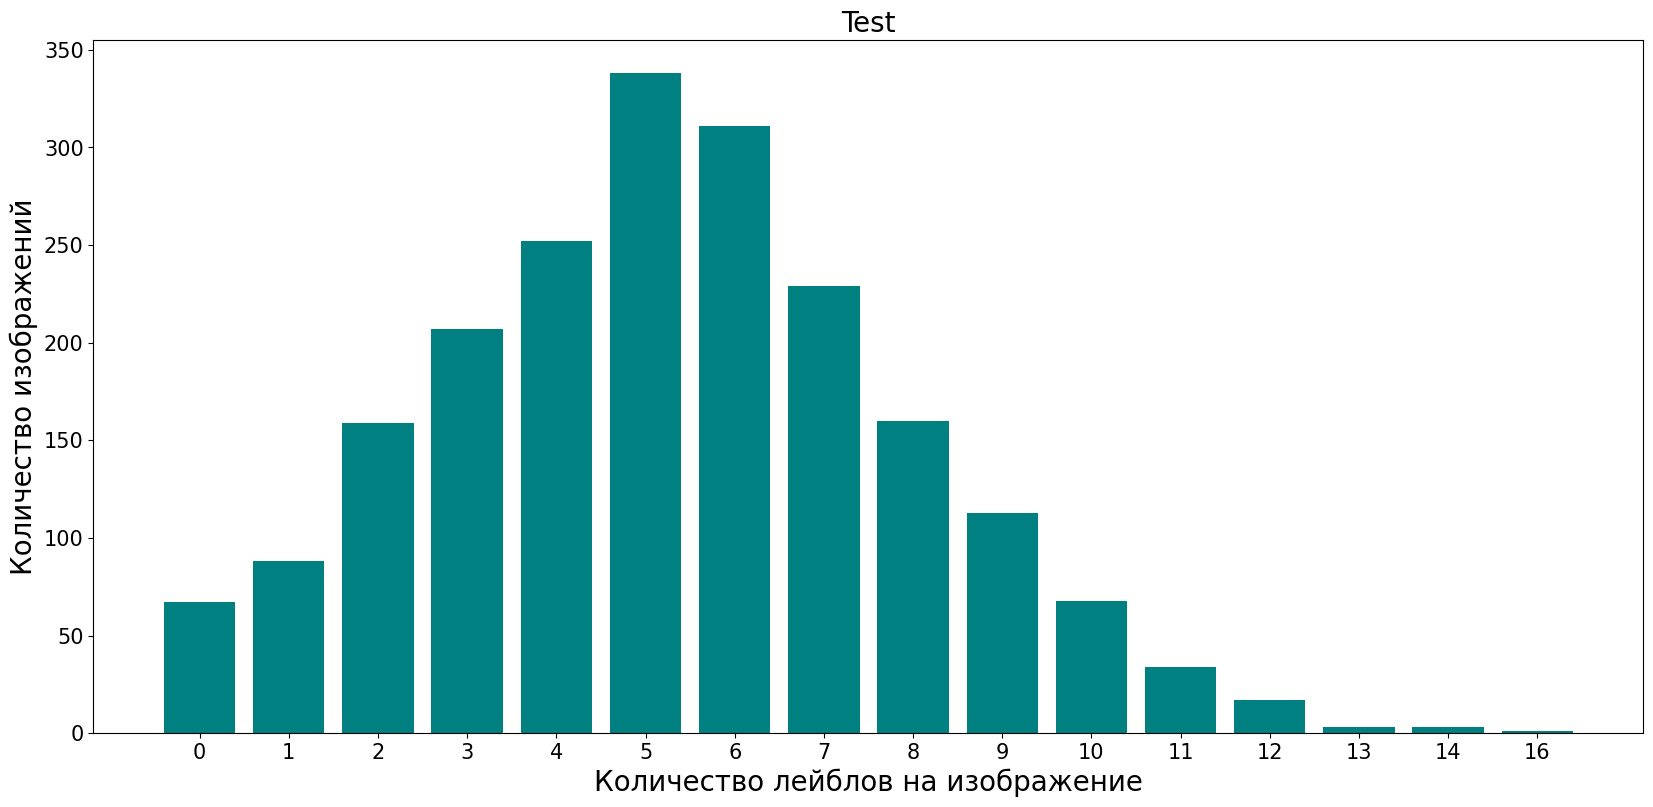

In [33]:
num_labels_per_image(df_test, 'Test')